<a href="https://colab.research.google.com/github/LeoFernanndes/portfolio/blob/master/Regression_Optimization_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carprice Dataset Regression

## Data Visualization

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


path='https://raw.githubusercontent.com/LeoFernanndes/datasets/master/automobile_uci_1985.csv'
df = pd.read_csv(path)
df_raw = df.copy()

In [59]:
# checking features data types
df = pd.read_csv(path)
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [60]:
# taking a glampse on how the data set looks like
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


Mean: 13207.129353233831
Median: 10295.0
Mode: 0      5572.0
1      6229.0
2      6692.0
3      7295.0
4      7609.0
5      7775.0
6      7898.0
7      7957.0
8      8495.0
9      8845.0
10     8921.0
11     9279.0
12    13499.0
13    16500.0
14    18150.0
dtype: float64



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


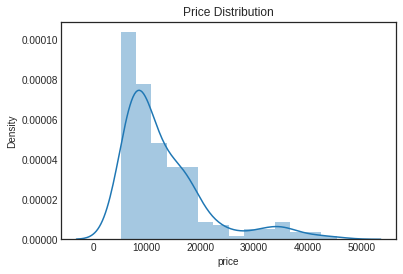

In [61]:
# price distribution
print("Mean: {}".format(df["price"].mean()))
print("Median: {}".format(df["price"].median()))
print("Mode: {}".format(df["price"].mode()))
print("")

plt.style.use("seaborn-white")
plt.title("Price Distribution")
sns.distplot(df["price"])
plt.show() 

Taking a glampse on price distribution we can spot some assimetries that are going to have effects on error distribution too. 
We can also see that some ways to handle mode are needed. Maybe binning could be a good solution


### Boxplots for comparison of categorical features

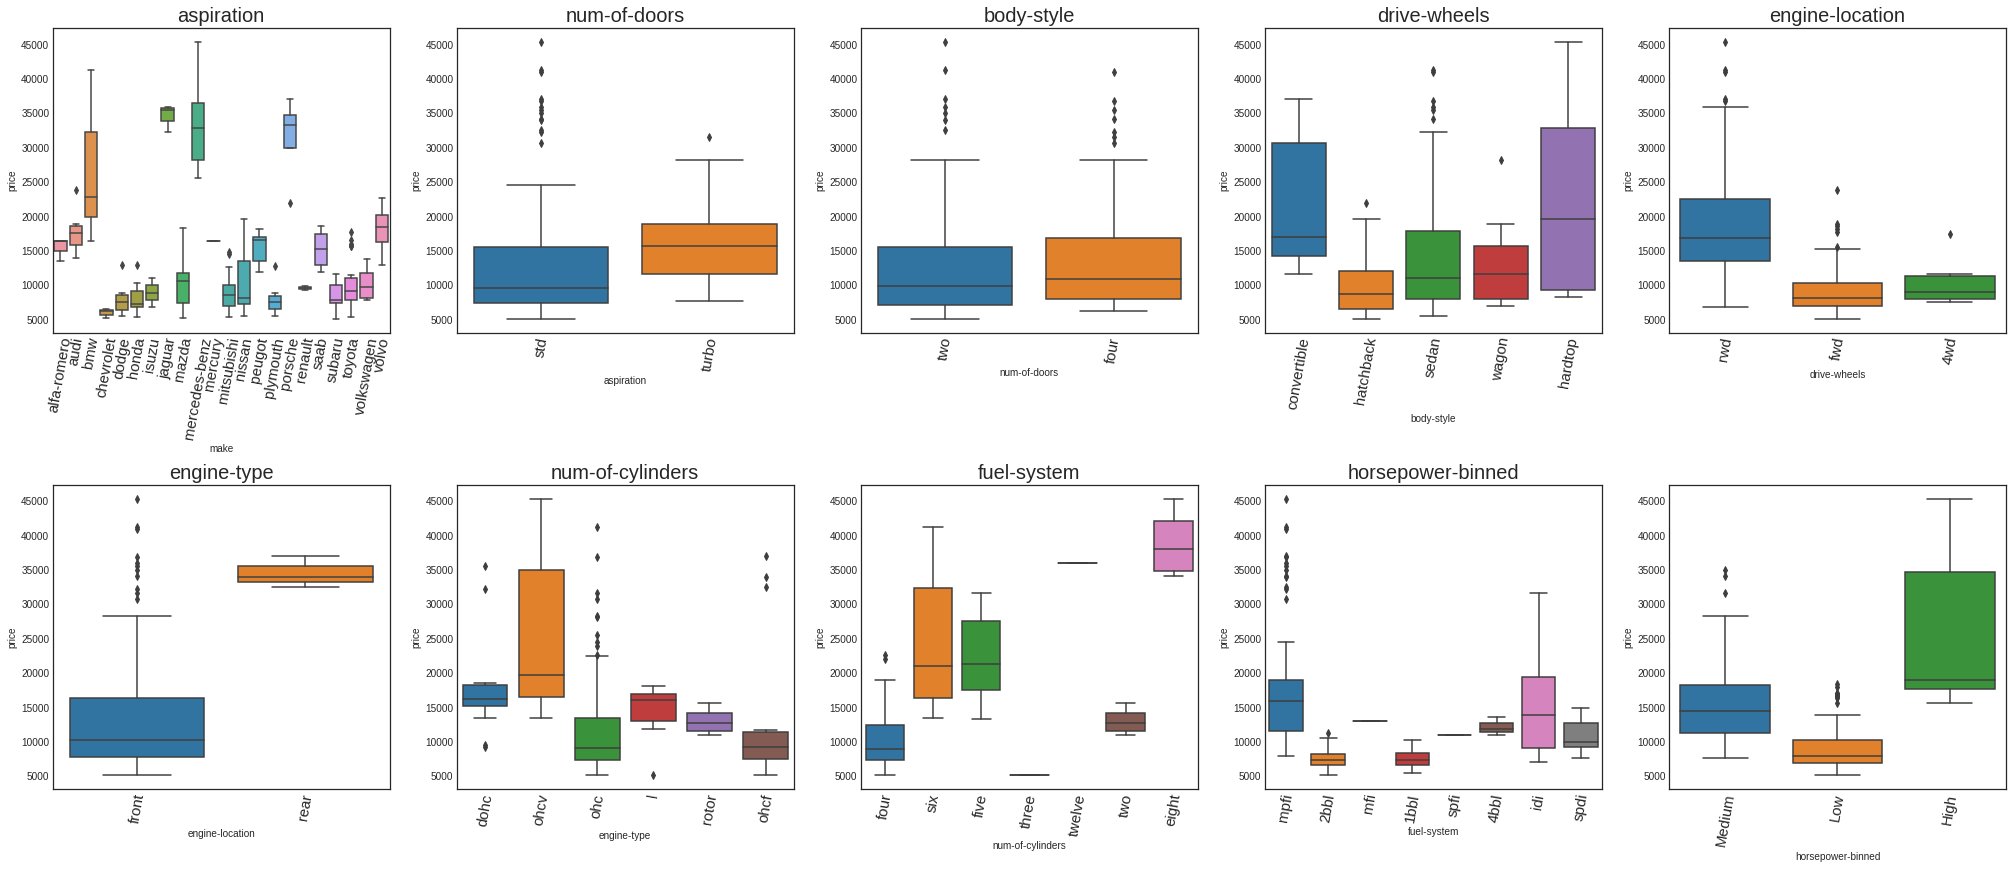

In [62]:
features = ['make', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system',
       'horsepower-binned']
       
nrows=2
ncols=5
font_size=15

plt.figure(figsize=(7 * ncols, 7 * nrows))
plt.subplots_adjust(hspace=0.5)
for idx in range(len(features)):
  plt.title("{}".format(features[idx]), fontsize=20)
  plt.subplot(nrows, ncols, idx+1)
  plot2 = sns.boxplot(x=features[idx], y="price", data=df)
  plt.xticks(rotation=80, fontsize=font_size)

### 3th degree polynom regression to search for correlation

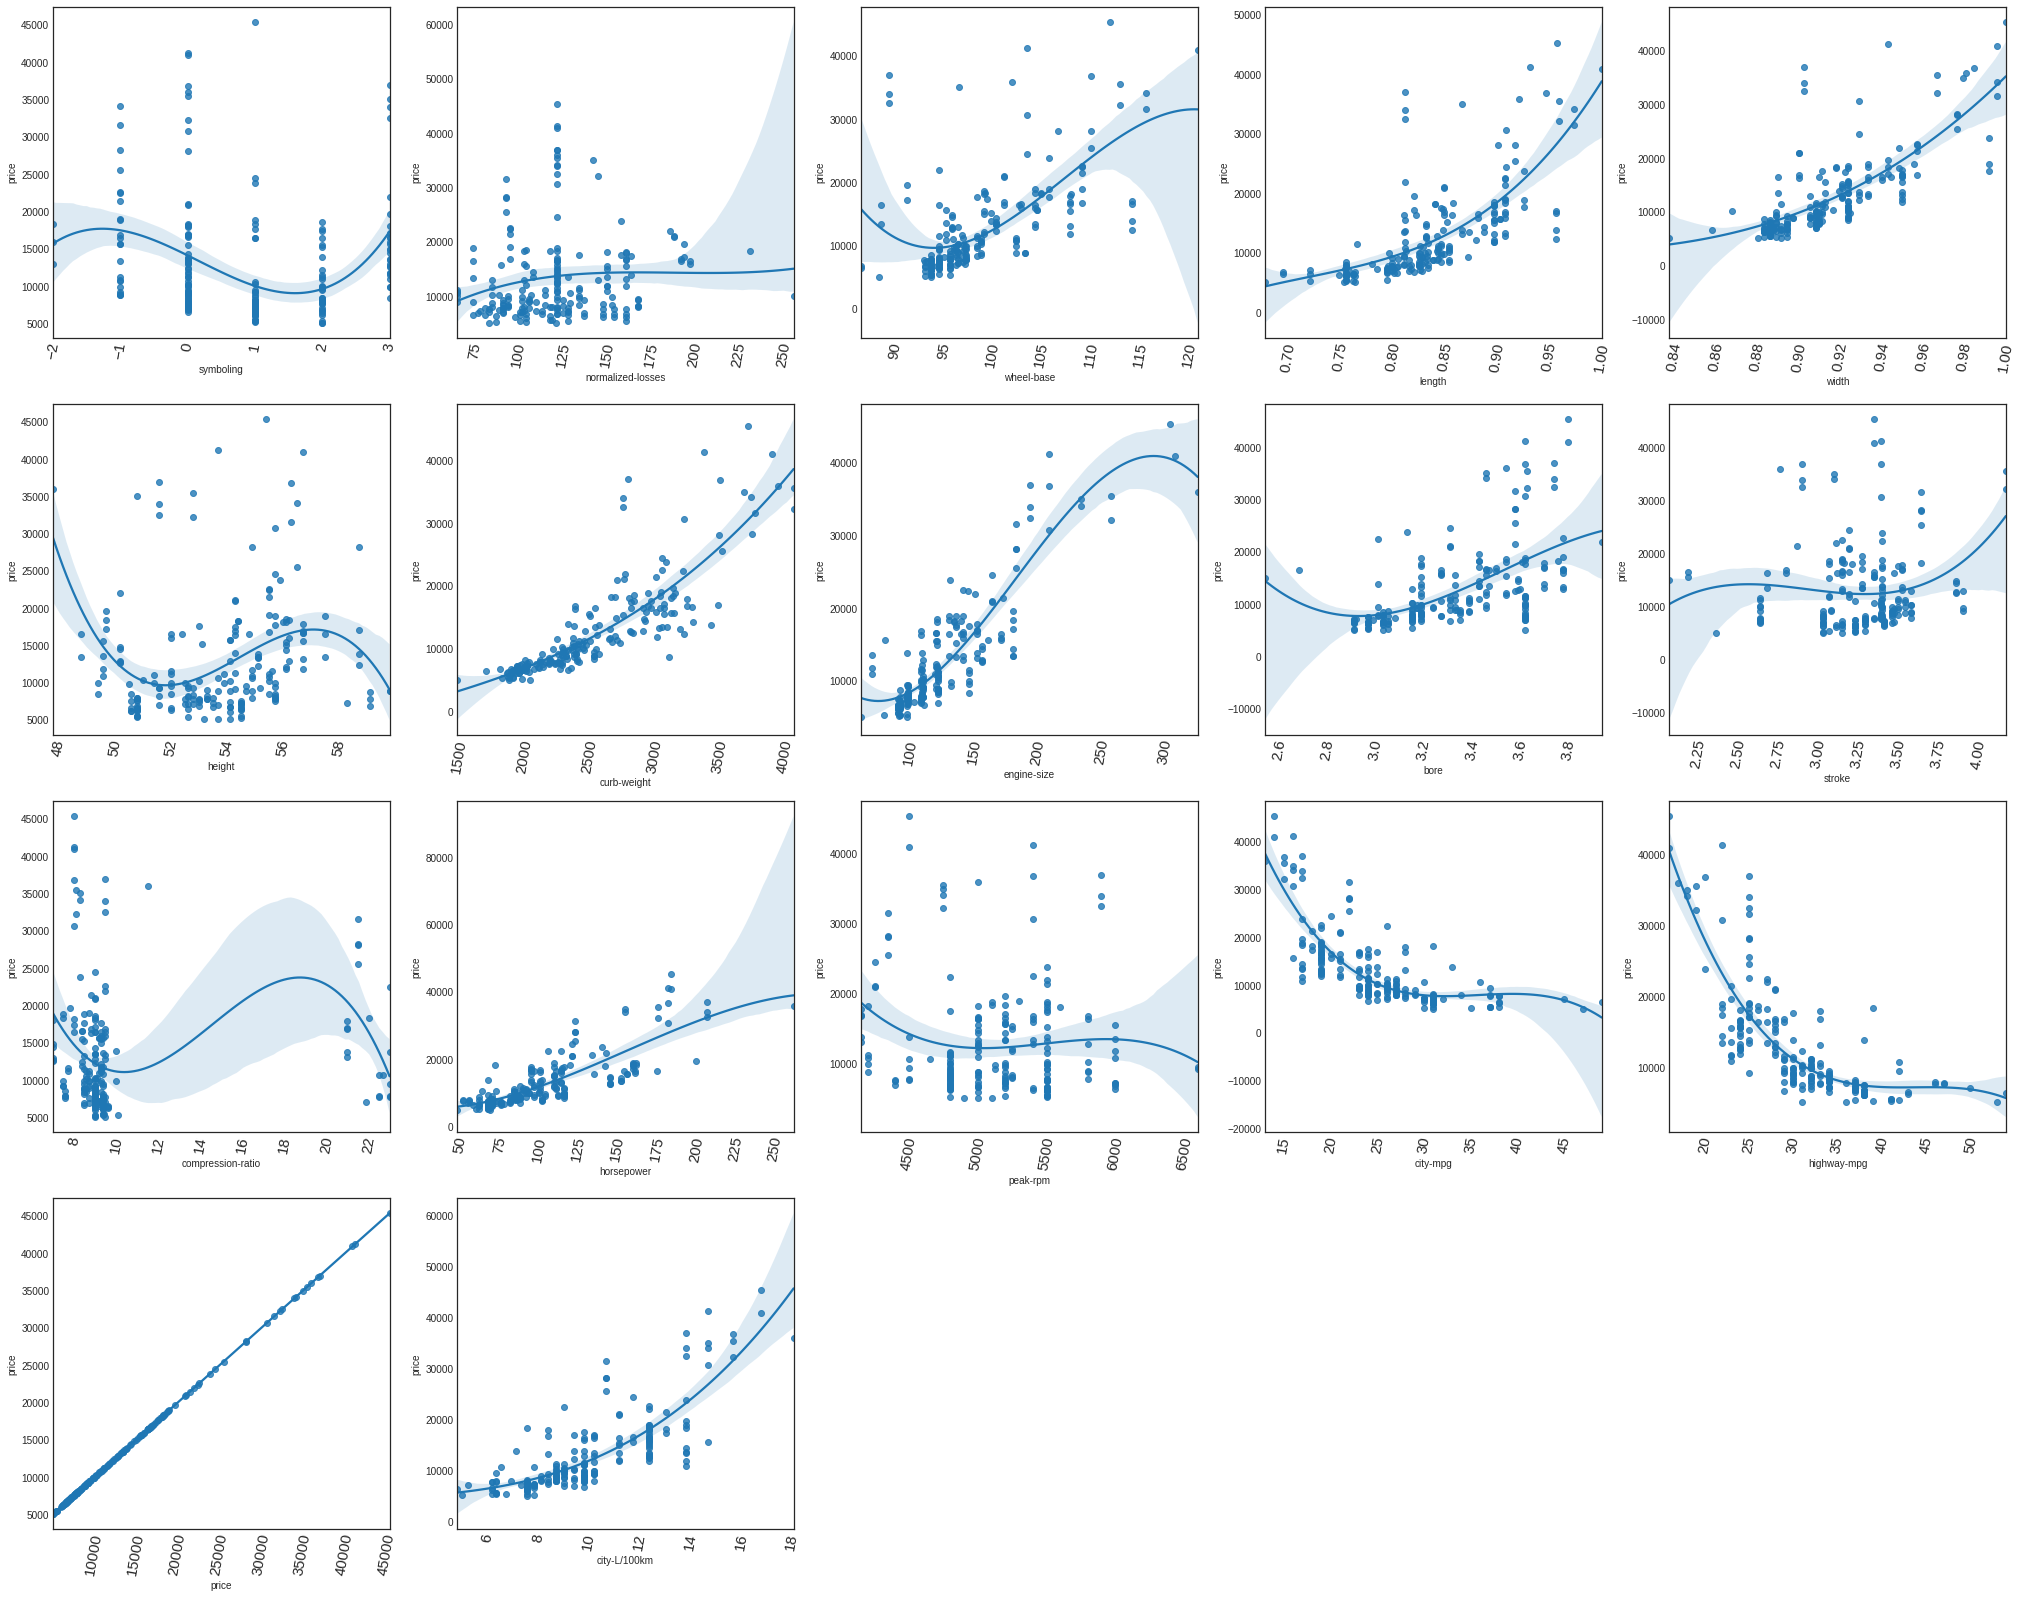

In [63]:
features = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km']

nrows=4
ncols=5
font_size=15

plt.figure(figsize=(7 * ncols, 7 * nrows))

for idx in range(len(features)):
  plt.subplot(nrows, ncols, idx+1)
  plot2 = sns.regplot(x=features[idx], y="price", order=3, data=df)
  plt.xticks(rotation=80, fontsize=font_size)

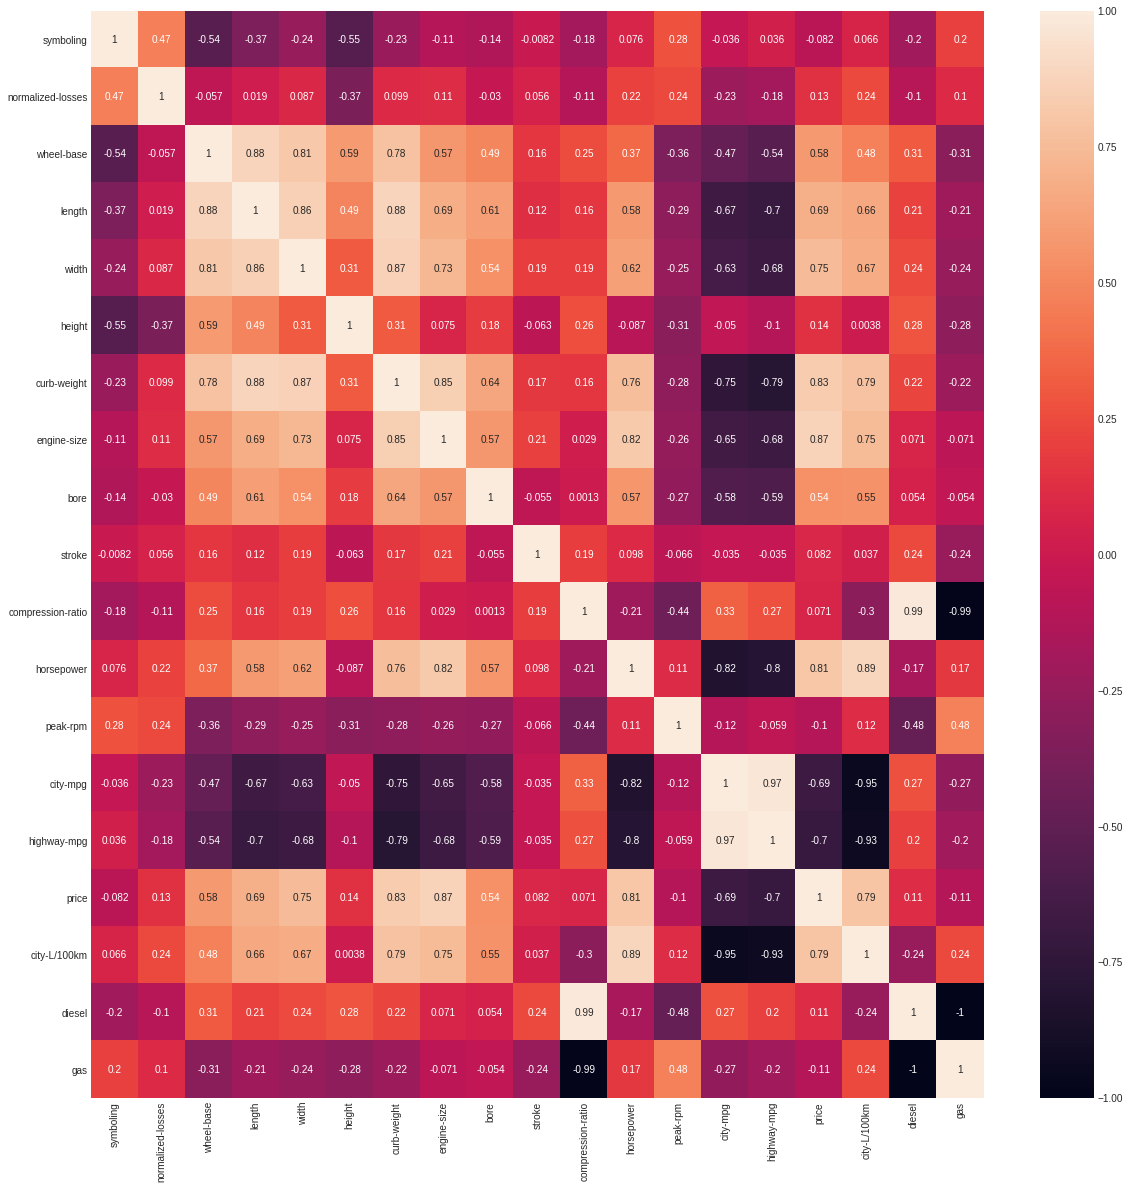

In [64]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)

### Heatmap for numerical features that meet a certain threshold

In [65]:
limit = 0
correlated_features = df.corr()["price"].loc[(df.corr()["price"] > limit) | (df.corr()["price"] < -limit)]
correlated_features

symboling           -0.082391
normalized-losses    0.133999
wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb-weight          0.834415
engine-size          0.872335
bore                 0.543155
stroke               0.082310
compression-ratio    0.071107
horsepower           0.809575
peak-rpm            -0.101616
city-mpg            -0.686571
highway-mpg         -0.704692
price                1.000000
city-L/100km         0.789898
diesel               0.110326
gas                 -0.110326
Name: price, dtype: float64

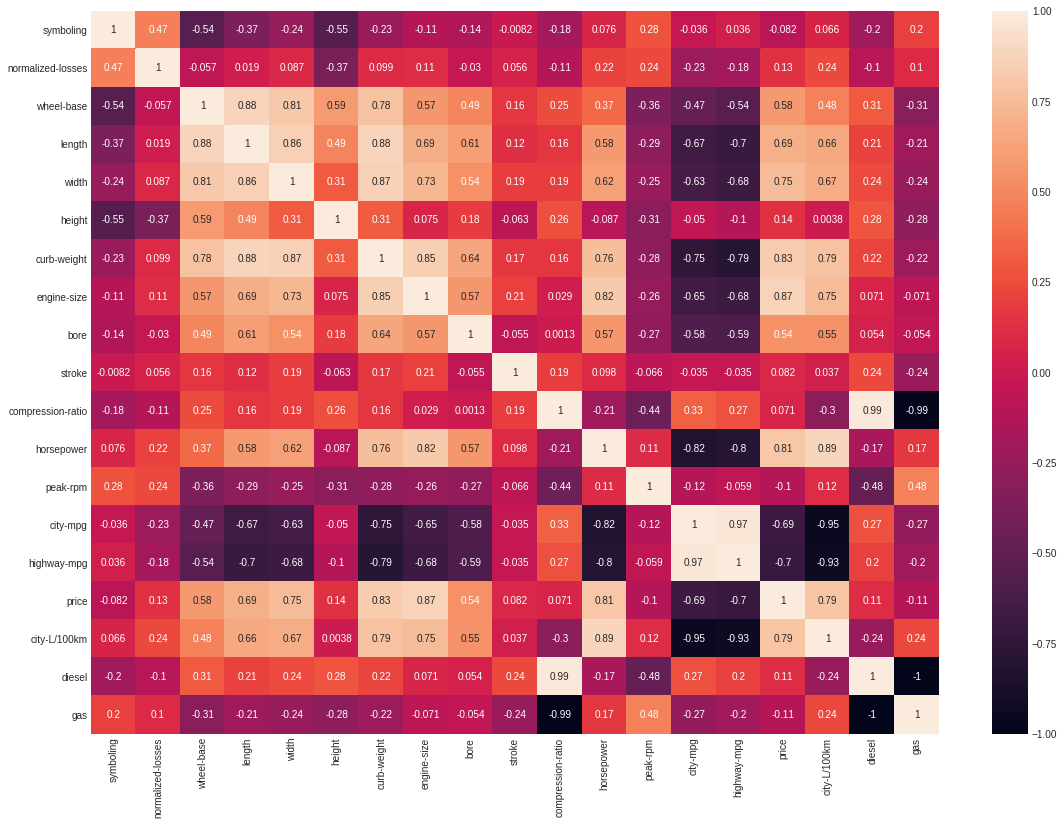

In [66]:
# correlation matrix for the selected features
corr = df[correlated_features.index].corr()
plt.figure(figsize=(len(correlated_features.index) * 1, len(correlated_features.index) * 0.7))
sns.heatmap(corr, annot=True)
plt.show()

## Data Preprocessing

Joining categorical features with those ones retrieved from filter of correlation coefficient limit above

In [67]:
correlated_features_ = list(correlated_features.index)

categorical_features_ = ['make', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system',
       'horsepower-binned']

for feature in  categorical_features_:
  if feature not in correlated_features_:
    correlated_features_.append(feature)

if "price" not in correlated_features_:
  correlated_features.append("price")

df = df[correlated_features_]
df.isnull().sum()

symboling            0
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
diesel               0
gas                  0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
engine-type          0
num-of-cylinders     0
fuel-system          0
horsepower-binned    1
dtype: int64

### Clusterization on unlabeled data

2 clusters - Silh 0.5451060138200541 - DaviesBouldin 0.6418414785518632 - cal 342.3150195954476
3 clusters - Silh 0.6010837244546666 - DaviesBouldin 0.45775435000539333 - cal 557.4151951882483
4 clusters - Silh 0.5628710237555032 - DaviesBouldin 0.5016686728947559 - cal 778.2331254347877
5 clusters - Silh 0.5384292075375268 - DaviesBouldin 0.5305116548663734 - cal 906.4760492444711
6 clusters - Silh 0.5060306583998045 - DaviesBouldin 0.581896013236248 - cal 984.6407422922879
7 clusters - Silh 0.49930815514180954 - DaviesBouldin 0.58471363436051 - cal 1061.707162018798



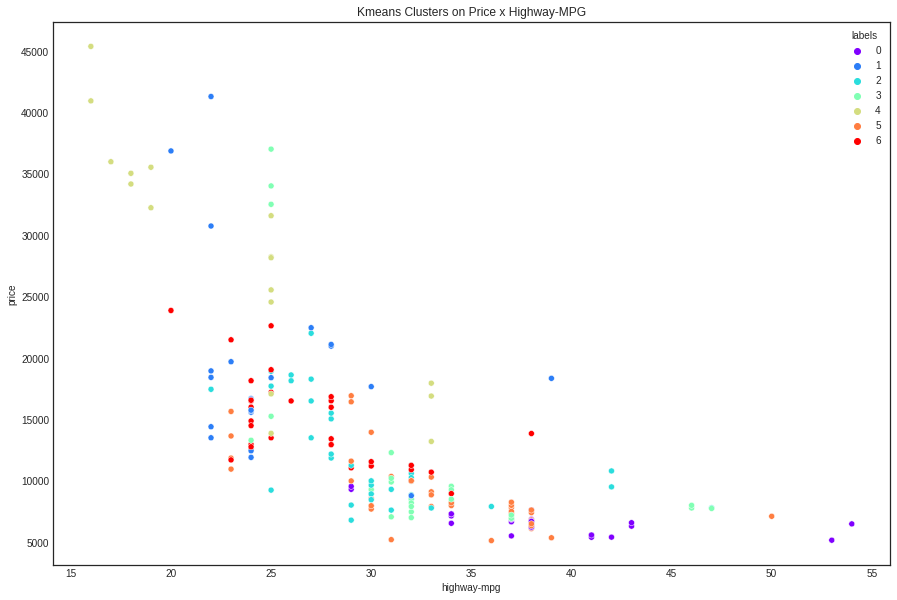

In [68]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score


df.fillna(df.mean(), inplace=True)

le = LabelEncoder()

for column in df.columns:
  if df[column].dtype == "object":
    df[column] = le.fit_transform(df[column].astype("str"))

norm = Normalizer()
values = norm.fit_transform(df.drop(columns=["price"]).values)

n_clusters_ = 7

kmeans = KMeans(n_clusters=n_clusters_, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)
df["labels"] = kmeans.labels_

plt.figure(figsize=(15, 10))
for n_clusters in np.arange(2, n_clusters_+1):
  kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
  y_pred = kmeans.fit_predict(values)

  labels = kmeans.labels_
  silhouette = silhouette_score(values, labels, metric="euclidean")
  dbs = davies_bouldin_score(values, labels)
  calinski = calinski_harabasz_score(values, labels)
  print("{} clusters - Silh {} - DaviesBouldin {} - cal {}".format(n_clusters, silhouette, dbs, calinski))

print("")

plt.title("Kmeans Clusters on Price x Highway-MPG")
sns.scatterplot(x="highway-mpg", y="price", data=df, hue="labels", palette="rainbow")
plt.show()

In [69]:
df = df.sample(frac=1)

X_val = df.drop(columns=["price"]).iloc[0:150]
y_val = df["price"].iloc[0:150]

X_test = df.drop(columns=["price"]).iloc[150:]
y_test = df["price"].iloc[150:]

## Pretty much the most simple regressor we can figure out

 naive regressor percentual Error: 0.30188077056585455 +/- 1.4930030173756068



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


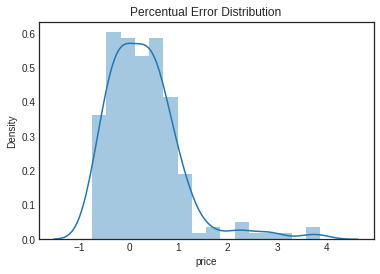

In [70]:
groupby = df.groupby(by=["engine-type"]).mean()

pred = []
for row in range(df.shape[0]):
  for line in range(groupby.shape[0]):
    if df["engine-type"][row] == groupby.iloc[line].name:
      pred.append(groupby.iloc[line].price)

error = np.sqrt((pred - df["price"])**2)
error2 = (pred - df["price"]) / df["price"]
print(" {} percentual Error: {} +/- {}".format("naive regressor", error2.mean(), 2 * error2.std()))
print("")

plt.title("Percentual Error Distribution")
sns.distplot(error2)
plt.show()

error_naive_regressor = error
error_naive_regressor2 = error2

## Linear Regression

 LinearRegression percentual Error: 0.0570455021683535 +/- 0.4423550212905143



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


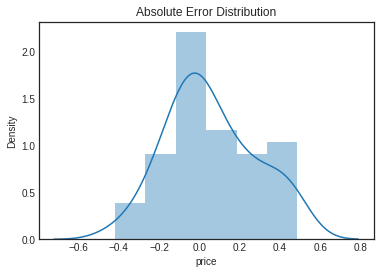

In [71]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_val, y_val)
pred = model.predict(X_test)
error = np.sqrt((pred - y_test)**2)
error2 = (pred - y_test) / y_test
print(" {} percentual Error: {} +/- {}".format(str(model).split("(")[0], error2.mean(), 2 * error2.std()))
print("")

plt.title("Absolute Error Distribution")
sns.distplot(error2)
plt.show()

error_linear_regressor = error
error_linear_regressor2 = error2

## Trying a little more generalization on the search

 RandomForestRegressor percentual Error: 0.022762239813175388 +/- 0.2533741611709193

 AdaBoostRegressor percentual Error: 0.07676456227204743 +/- 0.3437989346097425

 BaggingRegressor percentual Error: 0.017536672283922562 +/- 0.2754164453088503



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


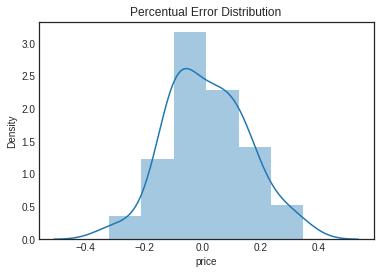

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

models = [
          RandomForestRegressor(),
          AdaBoostRegressor(),
          BaggingRegressor()
          ]

for model in models:
  model = model
  model.fit(X_val, y_val)
  pred = model.predict(X_test)
  error = np.sqrt((pred - y_test)**2)
  error2 = (pred - y_test) / y_test
  print(" {} percentual Error: {} +/- {}".format(str(model).split("(")[0], error2.mean(), 2 * error2.std()))
  print("") 

plt.title("Percentual Error Distribution")
sns.distplot(error2)
plt.show()

error_ensemble_regressor = error
error_ensemble_regressor2 = error2

## Randomly looking through the best ensemble parameters grid combinations

 Optimized Ensemble percentual Error: 0.023806079721292957 +/- 0.2648870579563583



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


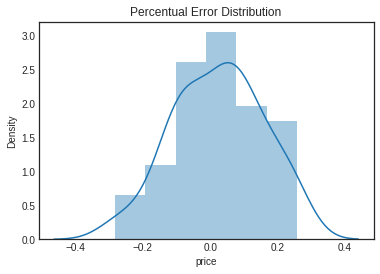

In [73]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


model = RandomForestRegressor()
fold = KFold(n_splits=5, shuffle=True)

param = {"n_estimators": np.arange(100, 1000, 100),
         "max_depth": np.arange(1, 17),
         "criterion": ["mse", "mae"]}

search = RandomizedSearchCV(model, param_distributions=param, scoring="neg_mean_absolute_error", cv=fold, n_jobs=-1)
search.fit(X_val, y_val)


model = search.best_estimator_
model.fit(X_val, y_val)
pred = model.predict(X_test)
error = np.sqrt((pred - y_test)**2)
error2 = (pred - y_test) / y_test
print(" {} percentual Error: {} +/- {}".format("Optimized Ensemble", error2.mean(), 2 * error2.std()))
print("")

plt.title("Percentual Error Distribution")
sns.distplot(error2)
plt.show()

error_optimized_ensemble_regressor = error
error_optimized_ensemble_regressor2 = error2

## The Neural Network approach using Keras

In [74]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.wrappers.scikit_learn import KerasRegressor


model = Sequential()
model.add(Dense(1024, input_dim=X_val.shape[1], kernel_initializer="normal", activation="relu"))
model.add(Dense(1))

opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss="mean_squared_error", optimizer=opt, metrics=["mean_absolute_error", "mean_absolute_percentage_error"])
resultados = model.fit(X_val, y_val, epochs=100, validation_split=0.3)

pred_test_ = model.predict(X_test)
pred_test = [item[0] for item in pred_test_]
error = np.sqrt((pred_test - y_test)**2)
eror2 = (pred_test - y_test) / y_test

error_nn_regressor = error
error_nn_regressor_percent = error2
error_nn_regressor2 = error2

Epoch 1/100
4/4 [==============================] - 0s 44ms/step - loss: 141509056.0000 - mean_absolute_error: 9215.0127 - mean_absolute_percentage_error: 69.1286 - val_loss: 43865052.0000 - val_mean_absolute_error: 4734.3257 - val_mean_absolute_percentage_error: 35.3725
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 75256240.0000 - mean_absolute_error: 7017.5117 - mean_absolute_percentage_error: 70.3917 - val_loss: 56779900.0000 - val_mean_absolute_error: 6559.2456 - val_mean_absolute_percentage_error: 68.0982
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 69165344.0000 - mean_absolute_error: 6955.9590 - mean_absolute_percentage_error: 73.2206 - val_loss: 40082740.0000 - val_mean_absolute_error: 4662.1929 - val_mean_absolute_percentage_error: 37.6413
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 54129392.0000 - mean_absolute_error: 4854.3535 - mean_absolute_percentage_error: 39.0900 - val_loss: 51717484.0000 - val

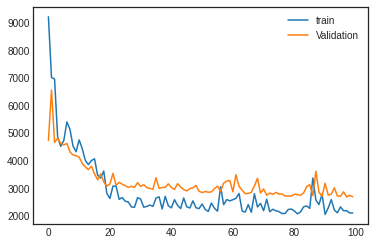


Absolute error test: 2413.9146273743872 +/- 4170.673158734365
Percentual error test: 0.023806079721292957 +/- 0.2648870579563583



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


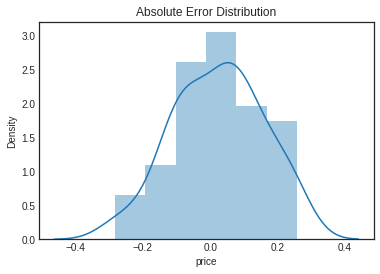

In [75]:
plt.plot(resultados.history["mean_absolute_error"], label="train")
plt.plot(resultados.history["val_mean_absolute_error"], label="Validation")
plt.legend()
plt.show()

print("")
print("Absolute error test: {} +/- {}".format(error_nn_regressor.mean(), 2 * error_nn_regressor.std()))
print("Percentual error test: {} +/- {}".format(error_nn_regressor_percent.mean(), 2 * error_nn_regressor_percent.std()))
print("")

plt.title("Absolute Error Distribution")
sns.distplot(error2)
plt.show()

## Exploring kmeans possibilities

Cluster 0: Absolute Error 0.00758691423713814 +/- 0.21776031586836936
Cluster 1: Absolute Error -0.0019174354825611279 +/- 0.16205283041690188
Cluster 2: Absolute Error -0.015480757563613693 +/- 0.3569208631809492
Cluster 3: Absolute Error 0.23166677874622654 +/- 0.5612529113161243
Cluster 4: Absolute Error 0.06361076673465674 +/- 0.3038085823850248
Cluster 5: Absolute Error 0.04925844781591988 +/- 0.22537014223128654
Cluster 6: Absolute Error 0.011149938736598919 +/- 0.12915155841279402

 Optimized Ensemble absolute Error: 1476.0267973856198 +/- 3591.900872921241
 Optimized Ensemble percentual Error: 0.045116079373623316 +/- 0.31005851301683535



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


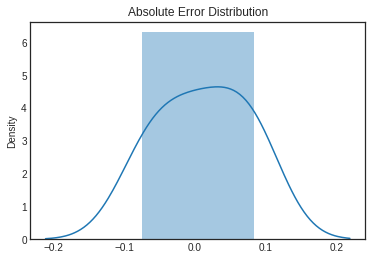

In [76]:
results = pd.DataFrame(columns=X_val.columns)
num_clus = []
mean = []
dispersion = []

reg = BaggingRegressor()

for cluster in range(n_clusters_):

  parcial = pd.DataFrame(columns=X_val.columns)

  X_val_ = X_val.loc[X_val["labels"] == cluster]
  y_val_ = df.loc[X_val_.index]["price"]
  
  X_test_ = X_test.loc[X_test["labels"] == cluster]
  y_test_ = df.loc[X_test_.index]["price"]

  if X_test_.shape[0] > 0:
    reg.fit(X_val_, y_val_)
    parcial = X_test_.copy()
    parcial["pred"] = reg.predict(X_test_)
    parcial["price"] = y_test_

    results = results.append(parcial)

    error_ = np.sqrt((parcial["pred"] - parcial["price"])**2)
    error_2 = (parcial["pred"] - parcial["price"]) / parcial["price"]

    print("Cluster {}: Absolute Error {} +/- {}".format(cluster, error_2.mean(), 2 * error_2.std()))
    
    num_clus.append(cluster)
    mean.append(error_.mean())
    dispersion.append(2 * error_.std())

cluster_results = pd.DataFrame({"Cluster": num_clus,
                                "Mean": mean,
                                "Dispersion": dispersion})
  
error = np.sqrt((results["pred"] - results["price"])**2)
error2 = (results["pred"] - results["price"]) / results["price"]
print("")
print(" {} absolute Error: {} +/- {}".format("Optimized Ensemble", error.mean(), 2 * error.std()))
print(" {} percentual Error: {} +/- {}".format("Optimized Ensemble", error2.mean(), 2 * error2.std()))
print("")

plt.title("Absolute Error Distribution")
sns.distplot(error_2)
plt.show()

error_kmeansBagging_classifier = error
error_kmeansBagging_classifier2 = error2

In [77]:
cluster_results

,Cluster,Mean,Dispersion
0,0,548.677778,565.733333
1,1,943.580000,2252.049508
2,2,1902.425000,3031.182255
3,3,2612.440000,7313.577260
4,4,2609.122222,4726.295035
5,5,928.266667,1635.721762
6,6,727.416667,976.437905


## Kmeans on clusters whose error variance is sufficiently low

   Cluster        Mean   Dispersion
1        1  943.580000  2252.049508
5        5  928.266667  1635.721762
6        6  727.416667   976.437905
0        0  548.677778   565.733333

Ratio of unlabeled data: 0.42857142857142855

 Optimized Ensemble absolute Error: 810.816091954023 +/- 1450.5734227539874
 Optimized Ensemble percentual Error: 0.023928803938643287 +/- 0.1926077691575625



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


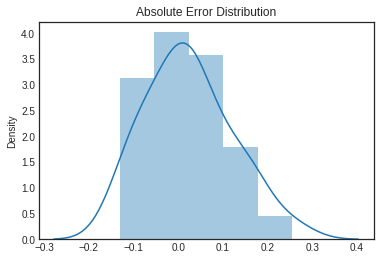

In [78]:
# filtering cluster whose variance is low
dispersion_treshold = 3000
cluster_results = cluster_results.sort_values(by=["Dispersion"], ascending=False)
cluster_results_ = cluster_results.loc[cluster_results["Dispersion"] < dispersion_treshold]
low_variance = cluster_results_["Cluster"].values

filtered_results = results[results["labels"].isin(low_variance)]

error = np.sqrt((filtered_results["pred"] - filtered_results["price"])**2)
error2 = (filtered_results["pred"] - filtered_results["price"]) / filtered_results["price"]

print(cluster_results_)
print("")
print("Ratio of unlabeled data: {}".format((cluster_results.shape[0] - cluster_results_.shape[0]) / cluster_results.shape[0]))
print("")
print(" {} absolute Error: {} +/- {}".format("Optimized Ensemble", error.mean(), 2 * error.std()))
print(" {} percentual Error: {} +/- {}".format("Optimized Ensemble", error2.mean(), 2 * error2.std()))
print("")

plt.title("Absolute Error Distribution")
sns.distplot(error2)
plt.show()

error_filtered_kmeansBagging_classifier = error
error_filtered_kmeansBagging_classifier2 = error2

   Cluster         Mean   Dispersion
3        3  2612.440000  7313.577260
4        4  2609.122222  4726.295035
2        2  1902.425000  3031.182255



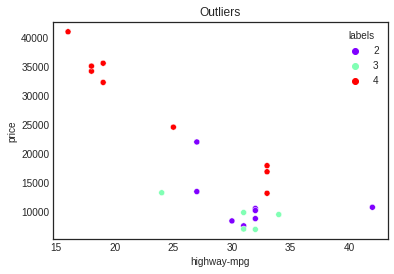

In [79]:
high_variance = [cluster for cluster in cluster_results["Cluster"].values if cluster not in low_variance]
outliers = results[results["labels"].isin(high_variance)]

cluster_results__ = cluster_results.loc[cluster_results["Dispersion"] > dispersion_treshold]
print(cluster_results__)
print("")

plt.title("Outliers")
sns.scatterplot(x="highway-mpg", y="price", data=outliers, hue="labels", palette="rainbow")
plt.show()

In [80]:
plt.style.available # to see available background style for plt

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

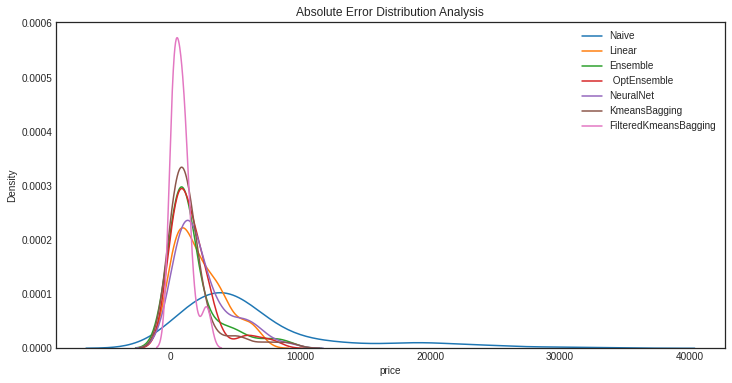


 Naive regressor absolute Error: 6427.87276702254 +/- 12631.180843995584
 Linear regressor absolute Error: 2198.174285687829 +/- 3672.1739450530395
 Ensemble regressor absolute Error: 1732.474509803921 +/- 4044.5348585651996
 Optimized Ensemble regressor absolute Error: 1683.7310784313727 +/- 3466.7176330346338
 NeuralNet regressor absolute error: 2413.9146273743872 +/- 4170.673158734365
 Kmeans Bagging regressor absolute error: 1476.0267973856198 +/- 3591.900872921241
 Filtered Kmeans Bagging regressor absolute error: 810.816091954023 +/- 1450.5734227539874


In [81]:
tamanho = 6
#plt.style.available # to see available background style for plt
plt.style.use("seaborn-white")
plt.figure(figsize=(2 * tamanho, 1 * tamanho))
sns.distplot(error_naive_regressor, hist=False, label="Naive")
sns.distplot(error_linear_regressor, hist=False, label="Linear")
sns.distplot(error_ensemble_regressor, hist=False, label="Ensemble")
sns.distplot(error_optimized_ensemble_regressor, hist=False, label=" OptEnsemble")
sns.distplot(error_nn_regressor, hist=False, label="NeuralNet")
sns.distplot(error_kmeansBagging_classifier, hist=False, label="KmeansBagging")
sns.distplot(error_filtered_kmeansBagging_classifier, hist=False, label="FilteredKmeansBagging")
plt.title("Absolute Error Distribution Analysis")
plt.legend()
plt.show()

print("")
print(" {} absolute Error: {} +/- {}".format("Naive regressor", error_naive_regressor.mean(), 2 * error_naive_regressor.std()))
print(" {} absolute Error: {} +/- {}".format("Linear regressor", error_linear_regressor.mean(), 2 * error_linear_regressor.std()))
print(" {} absolute Error: {} +/- {}".format("Ensemble regressor", error_ensemble_regressor.mean(), 2 * error_ensemble_regressor.std()))
print(" {} absolute Error: {} +/- {}".format("Optimized Ensemble regressor", error_optimized_ensemble_regressor.mean(), 2 * error_optimized_ensemble_regressor.std()))
print(" {} absolute error: {} +/- {}".format("NeuralNet regressor", error_nn_regressor.mean(), 2 * error_nn_regressor.std()))
print(" {} absolute error: {} +/- {}".format("Kmeans Bagging regressor", error_kmeansBagging_classifier.mean(), 2 * error_kmeansBagging_classifier.std()))
print(" {} absolute error: {} +/- {}".format("Filtered Kmeans Bagging regressor", error_filtered_kmeansBagging_classifier.mean(), 2 * error_filtered_kmeansBagging_classifier.std()))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

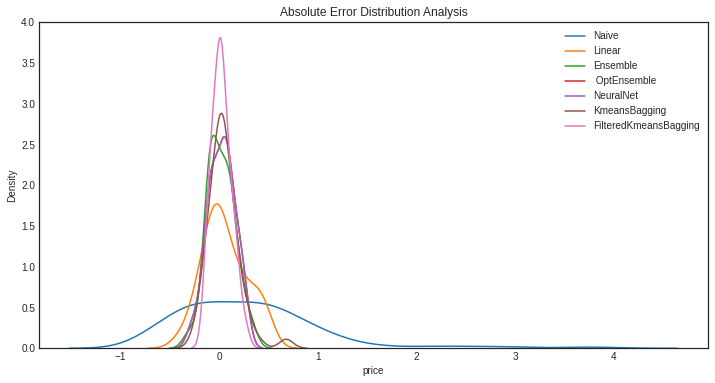


 Naive regressor absolute Error: 0.30188077056585455 +/- 1.4930030173756068
 Linear regressor absolute Error: 0.0570455021683535 +/- 0.4423550212905143
 Ensemble regressor absolute Error: 0.017536672283922562 +/- 0.2754164453088503
 Optimized Ensemble regressor absolute Error: 0.023806079721292957 +/- 0.2648870579563583
 NeuralNet regressor absolute error: 0.023806079721292957 +/- 0.2648870579563583
 Kmeans Bagging regressor absolute error: 0.045116079373623316 +/- 0.31005851301683535
 Filtered Kmeans Bagging regressor absolute error: 0.023928803938643287 +/- 0.1926077691575625


In [82]:
tamanho = 6
#plt.style.available # to see available background style for plt
plt.style.use("seaborn-white")
plt.figure(figsize=(2 * tamanho, 1 * tamanho))
sns.distplot(error_naive_regressor2, hist=False, label="Naive")
sns.distplot(error_linear_regressor2, hist=False, label="Linear")
sns.distplot(error_ensemble_regressor2, hist=False, label="Ensemble")
sns.distplot(error_optimized_ensemble_regressor2, hist=False, label=" OptEnsemble")
sns.distplot(error_nn_regressor2, hist=False, label="NeuralNet")
sns.distplot(error_kmeansBagging_classifier2, hist=False, label="KmeansBagging")
sns.distplot(error_filtered_kmeansBagging_classifier2, hist=False, label="FilteredKmeansBagging")
plt.title("Absolute Error Distribution Analysis")
plt.legend()
plt.show()

print("")
print(" {} percentual Error: {} +/- {}".format("Naive regressor", error_naive_regressor2.mean(), 2 * error_naive_regressor2.std()))
print(" {} percentual Error: {} +/- {}".format("Linear regressor", error_linear_regressor2.mean(), 2 * error_linear_regressor2.std()))
print(" {} percentual Error: {} +/- {}".format("Ensemble regressor", error_ensemble_regressor2.mean(), 2 * error_ensemble_regressor2.std()))
print(" {} percentual Error: {} +/- {}".format("Optimized Ensemble regressor", error_optimized_ensemble_regressor2.mean(), 2 * error_optimized_ensemble_regressor2.std()))
print(" {} percentual error: {} +/- {}".format("NeuralNet regressor", error_nn_regressor2.mean(), 2 * error_nn_regressor2.std()))
print(" {} percentual error: {} +/- {}".format("Kmeans Bagging regressor", error_kmeansBagging_classifier2.mean(), 2 * error_kmeansBagging_classifier2.std()))
print(" {} percentual error: {} +/- {}".format("Filtered Kmeans Bagging regressor", error_filtered_kmeansBagging_classifier2.mean(), 2 * error_filtered_kmeansBagging_classifier2.std()))

As a good practice, we usually use 2 standard deviations below and above mean in a normally distributed variable to encapsulate 95.44% of the possible results within the confidence interval, but we can also use z test to verify the limits for a given confidence interval.

z = ( x - mi ) / sigma 

x = 1.29 * 0.1324 + 0.023
x = 0.1937

So if we are willing to reduce confidence interval in a trade off between accuracy and precision, we can say that 90% of the results will be inside 0.023 +- 0.1937